In [44]:
import pandas as pd
import numpy as np

malpractice = pd.read_csv("medicalMalpractice.csv")

First, I'm going to do some EDA on the dataset

In [45]:
print(malpractice['Amount'].describe())
print(malpractice['Age'].value_counts())
print(malpractice['Gender'].value_counts())
print(malpractice['Insurance'].value_counts())
print(malpractice['Marital Status'].value_counts())
print(malpractice['Private Attorney'].value_counts())
print(malpractice['Severity'].value_counts())
print(malpractice['Specialty'].value_counts())


count     79210.000000
mean     157484.554816
std      193135.093293
min        1576.000000
25%       43670.250000
50%       98131.000000
75%      154675.250000
max      926411.000000
Name: Amount, dtype: float64
Age
43    1439
48    1418
47    1405
50    1395
44    1389
      ... 
84     142
85     134
86     121
1       97
0       89
Name: count, Length: 88, dtype: int64
Gender
Female    47770
Male      31440
Name: count, dtype: int64
Insurance
Private                 34289
Unknown                 24052
Medicare/Medicaid       10882
No Insurance             8002
Workers Compensation     1985
Name: count, dtype: int64
Marital Status
2    41220
1    22802
4    10362
0     3832
3      994
Name: count, dtype: int64
Private Attorney
1    52349
0    26861
Name: count, dtype: int64
Severity
3    28251
4    15709
5     9615
7     8873
9     7755
8     3627
6     3375
2     1340
1      665
Name: count, dtype: int64
Specialty
Family Practice           11436
General Surgery            9412
OBGY

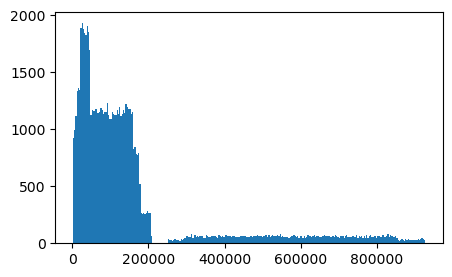

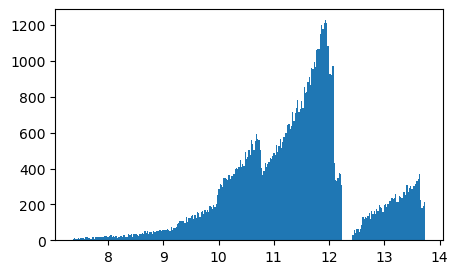

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.hist(malpractice['Amount'], bins = np.int16(np.sqrt(len(malpractice))))
plt.show()

plt.figure(figsize=(5, 3))
plt.hist(np.log(malpractice['Amount']), bins = np.int16(np.sqrt(len(malpractice))))
plt.show()



## Notes from EDA

Insurance and Marital Status both have missing values 

Amount is bimodal, with most between 0 and 200k but then some others having suits from 200k to 900k

Two different theoretical projects:
1. Predicting suit price by regression
2. Predicting whether a suit will be for more than 200k by classification

Now, I'm dealing with some of the errors I found during EDA:
- Changing marital status and private attorney from numbers to words describing the status
- Changing "unknown" to np.NaN so I can work with missing values

In [47]:
malpractice.loc[malpractice['Insurance'] == "Unknown", "Insurance"] = np.NaN
malpractice.loc[malpractice['Marital Status'] == 0, "Marital Status"] = "Divorced"
malpractice.loc[malpractice['Marital Status'] == 1, "Marital Status"] = "Single"
malpractice.loc[malpractice['Marital Status'] == 2, "Marital Status"] = "Married"
malpractice.loc[malpractice['Marital Status'] == 3, "Marital Status"] = "Widowed"
malpractice.loc[malpractice['Marital Status'] == 4, "Marital Status"] = np.NaN
malpractice.loc[malpractice['Private Attorney'] == 0, "Private Attorney"] = "Not Private"
malpractice.loc[malpractice['Private Attorney'] == 1, "Private Attorney"] = "Private"

Now, I'm going to split up the data. I want to guess whether a medical malpractice suit is going to cost more or less than $250k

In [57]:
from sklearn.model_selection import train_test_split
random_state = 42

X = malpractice.drop(columns='Amount')
y = malpractice['Amount'].copy()
y[y <= 250000] = 0
y[y > 250000] = 1

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = 0.6, stratify=y, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size=0.5, stratify=y_other, random_state=random_state)

0.14385809872490848
